In [1]:
#iris
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
x_train,x_test, y_train, y_test = train_test_split(iris["data"], iris["target"], random_state = 0) 

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

print("Test Score: {:.10f}".format(knn.score(x_test, y_test)))

Test Score: 0.9736842105


In [4]:
#synthetic

In [5]:
from sklearn.datasets import make_blobs 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [6]:
cmap_bold = ListedColormap(['blue','#FFFF00','black','green']) 
 
np.random.seed= 2021 
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8, 
                       cluster_std = 1.3, random_state = 4) 
y_D2 = y_D2 % 2 

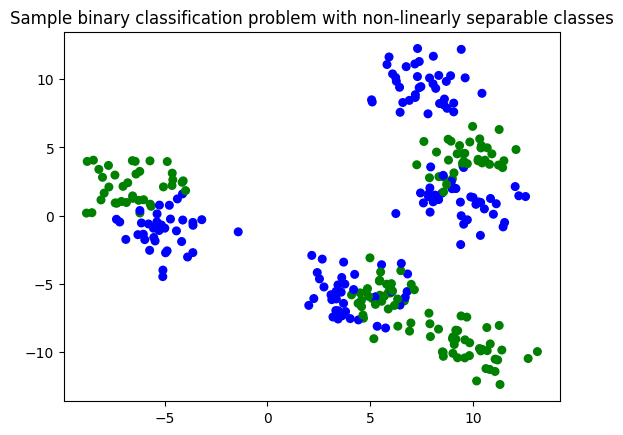

In [7]:

plt.figure() 
plt.title('Sample binary classification problem with non-linearly separable classes') 
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, 
           marker= 'o', s=30, cmap=cmap_bold)

In [8]:

X_R1, y_R1 = make_regression(n_samples = 100,n_features=1,n_informative=1,bias = 0,noise = 10)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1)

In [9]:

n_neighbors = 1
best_score = 0
while n_neighbors < 51:
     knn_reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train, y_train)
     knn_reg.score(X_test, y_test)  # R2 score
     X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1) 
     y_predict_output= knn_reg.predict(X_predict_input) 
     # R2 score from  sklearn.metrics
     z= knn_reg.predict(X_test)
     print (r2_score(y_test,  z))
     if((r2_score(y_test,  z)) > best_score): 
          best_score = r2_score(y_test,  z) 
     n_neighbors+=1
     
print("Best score equals - ", best_score)

0.9154071728160698
0.909139957328176
0.9077265258937772
0.904530352293862
0.8893161909235889
0.8812078465127724
0.8743930453096178
0.8659366686218944
0.8583033055608964
0.8530051873537297
0.8447076827597659
0.8519491184787353
0.8385111699798503
0.8223241469858186
0.8086860572338261
0.797053743271809
0.7807520753684907
0.7725781646074882
0.7729527944523319
0.7645257997555556
0.7552671102801584
0.7466502102062405
0.7382042186934421
0.7269152640856298
0.716226028808866
0.7028022700239319
0.6960266080369535
0.6795531208349501
0.6676226374705501
0.6593539770656319
0.6501869560421094
0.6348287151053777
0.6228324086940686
0.6113815484940526
0.6004648884456587
0.5844465404443118
0.5728012817313709
0.5649694438825885
0.553703529684259
0.5451065291988755
0.5299098301212573
0.5179445594570242
0.5037626412473968
0.49031766929993736
0.48138850248403897
0.468965793362227
0.45530311636291365
0.44148958203150157
0.4266284377936126
0.41136765175936496
Best score equals -  0.9154071728160698
